# *ML_ASSIGNMENT_01*

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#import data_set
df= pd.read_csv(r'C:\Users\Sibtain Mughal\Desktop\ML_data_set.csv',encoding = 'latin-1')

In [3]:
# summay statistics
df.describe() 

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [4]:
# missing values
df.isnull().sum() 

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
#drop the missing values
df.dropna(inplace=True)

#drop the rows where missing columns 
df.dropna(subset=['Manufacturer'],inplace=True)

In [9]:
# find dublicates values
df.duplicated()

0      False
1      False
3      False
4      False
5      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 117, dtype: bool

___

## QUESTION_01

In [12]:
df.dtypes 

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

---

## QUESTION_02

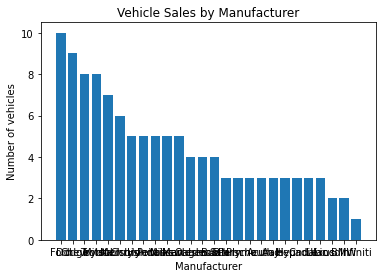

In [20]:

# Get counts of each manufacturer
manufacturers = df['Manufacturer']. value_counts()

# Plot bar graph
plt.bar(manufacturers.index, manufacturers)

# add labels and title
plt.title('Vehicle Sales by Manufacturer')
plt.ylabel('Number of vehicles')
plt.xlabel('Manufacturer')

# save the plot
plt.savefig('manufacturer_bar.png')

#show plot
plt.show()


---

## QUESTION_03

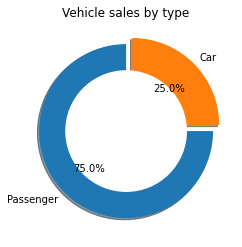

In [28]:

# get count of each vehicle type
vehicle_counts = df['Vehicle_type'].value_counts()

#calculate percentage
vehicle_percent = (vehicle_counts/vehicle_counts.sum()).round(2)*100

#plot pie chart
labels = vehicle_percent.index
sizes = vehicle_percent
explode = [0]*len(labels)
explode[1]=0.1

fig1, ax1 = plt.subplots()
ax1 .pie(sizes, explode=explode , labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

#draw the circle
centre_circle = plt.Circle((0,0),0.70,fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

#Add title
plt.title('Vehicle sales by type')
plt.show()

---

## QUESTION_04

In [30]:
# Calculate the mean price
mean = df['Price_in_thousands'].mean()
print(f"Average Price(mean): ${mean:,.2f}")

Average Price(mean): $25.97


---

## QUESTION_05

In [40]:
# Numeric columns to analyze
col_name =  ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

#calculate varience
var= df[col_name].var()

#calculate std
std= df[col_name].std()

print(f"Variance:\n{var}" )
print(f"Standard Deviation:\n{std}" )

Variance:
Sales_in_thousands     5633.843458
__year_resale_value     134.690698
Price_in_thousands      200.213992
Engine_size               1.113382
Horsepower             3432.997347
dtype: float64
Standard Deviation:
Sales_in_thousands     75.058933
__year_resale_value    11.605632
Price_in_thousands     14.149699
Engine_size             1.055169
Horsepower             58.591786
dtype: float64


---

## QUESTION_06

In [45]:
# columns
numeric_cols = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1
    
# outlier boundries
lower_bound = q1 - 1.5 * iqr
Upper_bound = q3 - 1.5 * iqr

# identify outlier
outliers = df[(df[col]<lower_bound)| (df[col]>Upper_bound)]

print(f"IQR for {col}:{iqr}")
print(f"Number of outlier in {col}:{outliers.shape[0]}")

IQR for Horsepower:70.0
Number of outlier in Horsepower:113


---

## QUESTION_07

In [55]:
# defining col

numeric_cols = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower','Wheelbase','Width','Fuel_efficiency','Curb_weight']

for col in numeric_cols:
    # histogram
    plt.hist(df[col])
    plt.title(col)
    plt.close()
    
#skewness
skew = stats.skew(df[col])
print(f'Skewness for {col} is {skew}')

if skew==0:
    print(f'{col} has a symmetical distribution')
elif skew<0:
    print(f'{col} is skewed left')
else:
    print(f'{col}is skewed right')

Skewness for Curb_weight is 0.20582173273027804
Curb_weightis skewed right
